# yTub::GFP lineplot visualization

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure2'

In [3]:
ls

2024-05-21 new lineplots.ipynb
data/
figs/
output/
yTub23C-GFP and yTub37C-GFP PP4KO.ipynb


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure2' # home directory
figs_dir = home_dir + '/figs/' # directory to hold the figure output
data_dir = home_dir + '/data/' # directory holding the data
outs_dir = home_dir + '/output/' # directory to save any output csv files to 

# Generating yTub37C::GFP plots

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


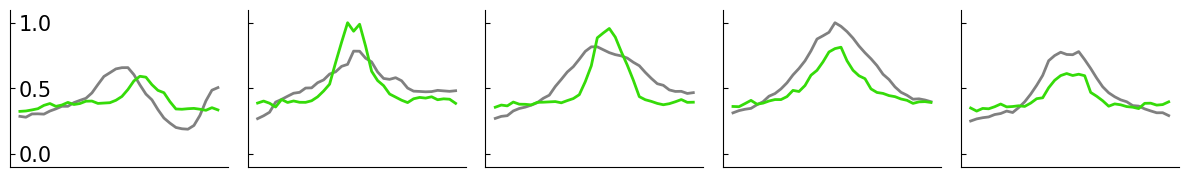

In [5]:
os.chdir(data_dir)

df = pd.read_excel('WT yTub.xlsx')
w = 2 # sets line width

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="frame", height = 2.5, aspect = 1)

p = ['grey', '#35DB09']
# Map the lineplot
g.map(sns.lineplot, "Distance", "normalized RFP", color = 'grey', lw = w)
g.map(sns.lineplot, "Distance", "normalized GFP", color = '#35DB09', lw = w)

# Remove the titles for each subplot
g.set_titles("")

# Modify y-axis label
g.set_axis_labels("", "")

# Customize tick markers
for ax in g.axes.flat:
    ax.set_xticks([]);  # Remove x-ticks
    ax.set_yticks([0, 0.5, 1.0]); # sets specific y ticks
    ax.set_ylim(-0.1,1.1)
    ax.tick_params(axis='y', labelsize=15, direction="in", pad=-30);  # Increase the size of the y-axis ticks, places them inside plot

os.chdir(figs_dir)
plt.savefig('WT yTub.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('WT yTub.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


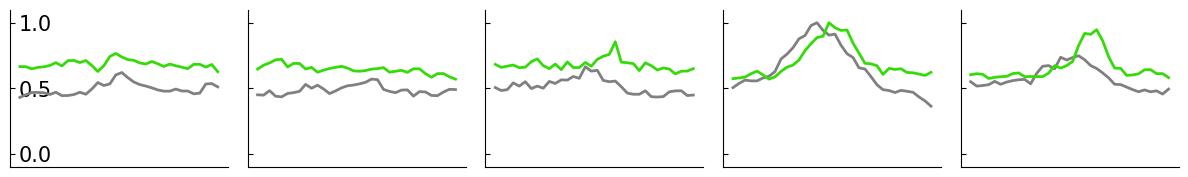

In [6]:
os.chdir(data_dir)

df = pd.read_excel('KO yTub.xlsx')
w = 2 # sets line width

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="frame", height = 2.5, aspect = 1)

p = ['grey', '#35DB09']
# Map the lineplot
g.map(sns.lineplot, "Distance (um)", "normalized RFP", color = 'grey', lw = w)
g.map(sns.lineplot, "Distance (um)", "normalized GFP", color = '#35DB09', lw = w)

# Remove the titles for each subplot
g.set_titles("")

# Modify y-axis label
g.set_axis_labels("", "")

# Customize tick markers
for ax in g.axes.flat:
    ax.set_xticks([]);  # Remove x-ticks
    ax.set_yticks([0, 0.5, 1.0]); # sets specific y ticks
    ax.set_ylim(-0.1,1.1)
    ax.tick_params(axis='y', labelsize=15, direction="in", pad=-30);  # Increase the size of the y-axis ticks, places them inside plot

os.chdir(figs_dir)
plt.savefig('KO yTub.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('KO yTub.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

In [7]:
os.chdir(data_dir)

df = pd.read_excel('yTub alleles control.xlsx')
w = 2 # sets line width

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="frame", height = 2.5, aspect = 1)

p = ['#3386FF', '#FF5733']
# Map the lineplot
g.map(sns.lineplot, "Distance_(microns)", "normalized AC", color = '#3386FF', lw = w)
g.map(sns.lineplot, "Distance_(microns)", "normalized BC", color = '#FF5733', lw = w)

# Remove the titles for each subplot
g.set_titles("")

# Modify y-axis label
g.set_axis_labels("", "")

# Customize tick markers
for ax in g.axes.flat:
    ax.set_xticks([]);  # Remove x-ticks
    ax.set_yticks([0, 0.5, 1.0]); # sets specific y ticks
    ax.set_ylim(-0.1,1.1)
    ax.tick_params(axis='y', labelsize=15, direction="in", pad=-30);  # Increase the size of the y-axis ticks, places them inside plot

os.chdir(figs_dir)
plt.savefig('yTub allele control.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('yTub allele control.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

FileNotFoundError: [Errno 2] No such file or directory: 'yTub alleles control.xlsx'

# yTub23C::GFP plots

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


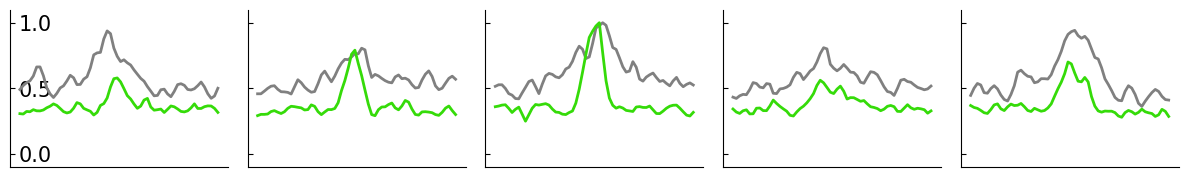

In [8]:
os.chdir(data_dir)

df = pd.read_excel('WT yTub23C.xlsx')
w = 2 # sets line width

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="frame", height = 2.5, aspect = 1)

p = ['grey', '#39b54a']
# Map the lineplot
g.map(sns.lineplot, "Distance", "normalized RFP", color = 'grey', lw = w)
g.map(sns.lineplot, "Distance", "normalized GFP", color = '#35DB09', lw = w)

# Remove the titles for each subplot
g.set_titles("")

# Modify y-axis label
g.set_axis_labels("", "")

# Customize tick markers
for ax in g.axes.flat:
    ax.set_xticks([]);  # Remove x-ticks
    ax.set_yticks([0, 0.5, 1.0]); # sets specific y ticks
    ax.set_ylim(-0.1,1.1)
    ax.tick_params(axis='y', labelsize=15, direction="in", pad=-30);  # Increase the size of the y-axis ticks, places them inside plot

os.chdir(figs_dir)
plt.savefig('WT yTub23C.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('WT yTub23C.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Applications/anaconda3/envs/tester/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


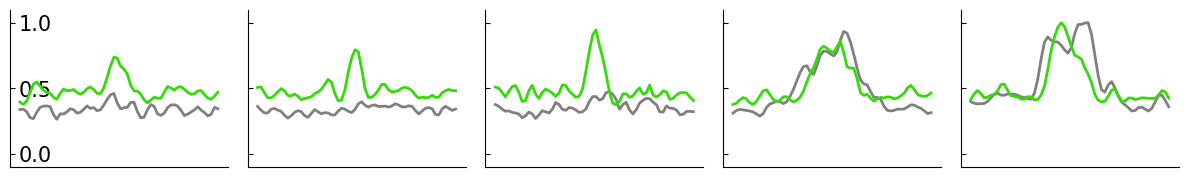

In [9]:
os.chdir(data_dir)

df = pd.read_excel('KO yTub23C.xlsx')
w = 2 # sets line width

# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="frame", height = 2.5, aspect = 1)

p = ['grey', '#39b54a']
# Map the lineplot
g.map(sns.lineplot, "Distance", "normalized RFP", color = 'grey', lw = w)
g.map(sns.lineplot, "Distance", "normalized GFP", color = '#35DB09', lw = w)

# Remove the titles for each subplot
g.set_titles("")

# Modify y-axis label
g.set_axis_labels("", "")

# Customize tick markers
for ax in g.axes.flat:
    ax.set_xticks([]);  # Remove x-ticks
    ax.set_yticks([0, 0.5, 1.0]); # sets specific y ticks
    ax.set_ylim(-0.1,1.1)
    ax.tick_params(axis='y', labelsize=15, direction="in", pad=-30);  # Increase the size of the y-axis ticks, places them inside plot

os.chdir(figs_dir)
plt.savefig('KO yTub23C.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('KO yTub23C.svg', dpi = 600, bbox_inches = 'tight')
plt.show();